# Implementation of Decision Tree , Random Forest and Bagging Classifier

### 1. Problem statement.
* The dataset Comprises of data for red wine quality based on different features that the wine has.
* The problem is a multiclass problem and we need to create a model that predicts the quality of the wine based on other features.
* Prediction result can be used by manufacturer to improve the quality of the wine and the consumer can use it for knowing the qality of wine

### 2. Data Collection.
Source:
  
Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009
  


#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas_profiling
import pickle
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

#### Loading Dataset

In [2]:
wine = pd.read_csv("winequality-red.csv")
df = wine.copy()
df.head(10).style.background_gradient(cmap = "Reds_r")

#### Sample

In [3]:
df.sample(8)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1088           11.6              0.41         0.54             1.5      0.095   
1081            7.9              0.30         0.68             8.3      0.050   
1044            6.4              0.39         0.33             3.3      0.046   
1001            9.9              0.35         0.38             1.5      0.058   
892            10.1              0.45         0.23             1.9      0.082   
1158            6.7              0.41         0.43             2.8      0.076   
1379            7.5              0.57         0.02             2.6      0.077   
43              8.1              0.66         0.22             2.2      0.069   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1088                 22.0                  41.0  0.99735  3.02       0.76   
1081                 37.5                 289.0  0.99316  3.01       0.51   
1044                 12.0                  53.0  0.99294  3.36       0.62   
1001                 31.0                  47.0  0.99676  3.26       0.82   
892                  10.0                  18.0  0.99774  3.22       0.65   
1158                 22.0                  54.0  0.99572  3.42       1.16   
1379                 11.0                  35.0  0.99557  3.36       0.62   
43                    9.0                  23.0  0.99680  3.30       1.20   

      alcohol  quality  
1088      9.9        7  
1081     12.3        7  
1044     12.2        6  
1001     10.6        7  
892       9.3        6  
1158     10.6        6  
1379     10.8        6  
43       10.3        5

#### Columns/ Features

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Feature Information : 
#### Input Features: 
* __fixed acidity__ : most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

* __volatile acidity__ : the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

* __citric acid__ : found in small quantities, citric acid can add 'freshness' and flavor to wines

* __residual sugar__ : the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and

* __chlorides__ : the amount of salt in the wine

* __free sulfur dioxide__ : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents

* __total sulfur dioxide__ : amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2

* __density__ : the density of water is close to that of water depending on the percent alcohol and sugar content

* __ph__ : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the

* __sulphates__ : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and

* __alcohol__ : the percent alcohol content of the wine

#### Output Feature : 
* __quality__ : scale that describes the quality of the red wine. 

#### Basic Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Descriptive Statistics of Numeric Variables

In [6]:
df.describe().T.style.background_gradient(cmap = "magma")

#### Profiling Report

In [7]:
#profiling = pandas_profiling.ProfileReport(df)
#profiling

# 3. Cleaning dataset

#### Null Values

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are __No null values__ in the dataframe.

#### Duplicate entries

In [9]:
df.duplicated().sum()

240

__Observations__ :          
There are 240 duplicates. The quality ratings for the same/similar wine were given by different wine tasters so there is a possibility of similar reviews. We can thus keep these duplicates. 

# 4. EDA

### Unique Values of Quality(Target Variable)

In [10]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

__Observations__:   

  Target variable/Dependent variable is discrete and categorical in nature.    
“quality” score scale ranges from 1 to 10; 1 being poor and 10 being the best.      
1,2,9 & 10 Quality ratings are not given by any observation. Only scores obtained are between 3 to 8.     


### Frequency Counts of each Quality Value

In [11]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

__Observations__:

“quality” has most values concentrated in the categories 5, 6 and 7.  
Only a few observations made for the categories 3 & 8  


#### Renaming Columns

In [12]:
df.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
       'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'},inplace=True)

In [13]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

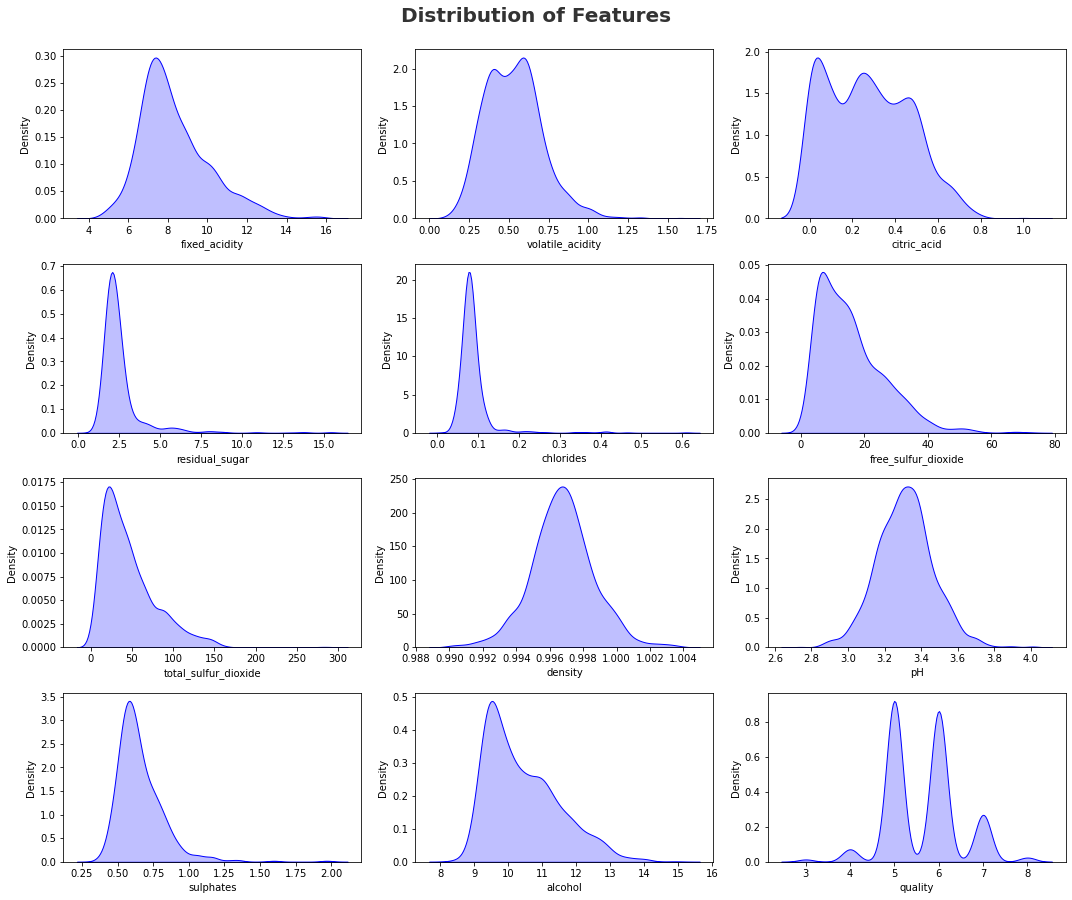

In [14]:
plt.figure(figsize=(15, 15))
plt.suptitle('Distribution of Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(df.columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[df.columns[i]],shade=True, color='b')
    plt.xlabel(df.columns[i])
    plt.tight_layout()

__observation:__  
Analyzing the graphs here, it turns out that the values of the variable 'fixed_acidity' are relatively normally distributed (but a bit left skewed). But there are two peaks in the distributions of other 'volatile_acidity' and 'citric_acid' variables.Features 'residual_sugar' , 'chlorides' , 'free_sulfur_dioxide' , 'sulphates' and 'alcohol' are hoghly skewed to left , showing non normality sign. 'density' and 'ph' columns are almost normally disrtibuted. 

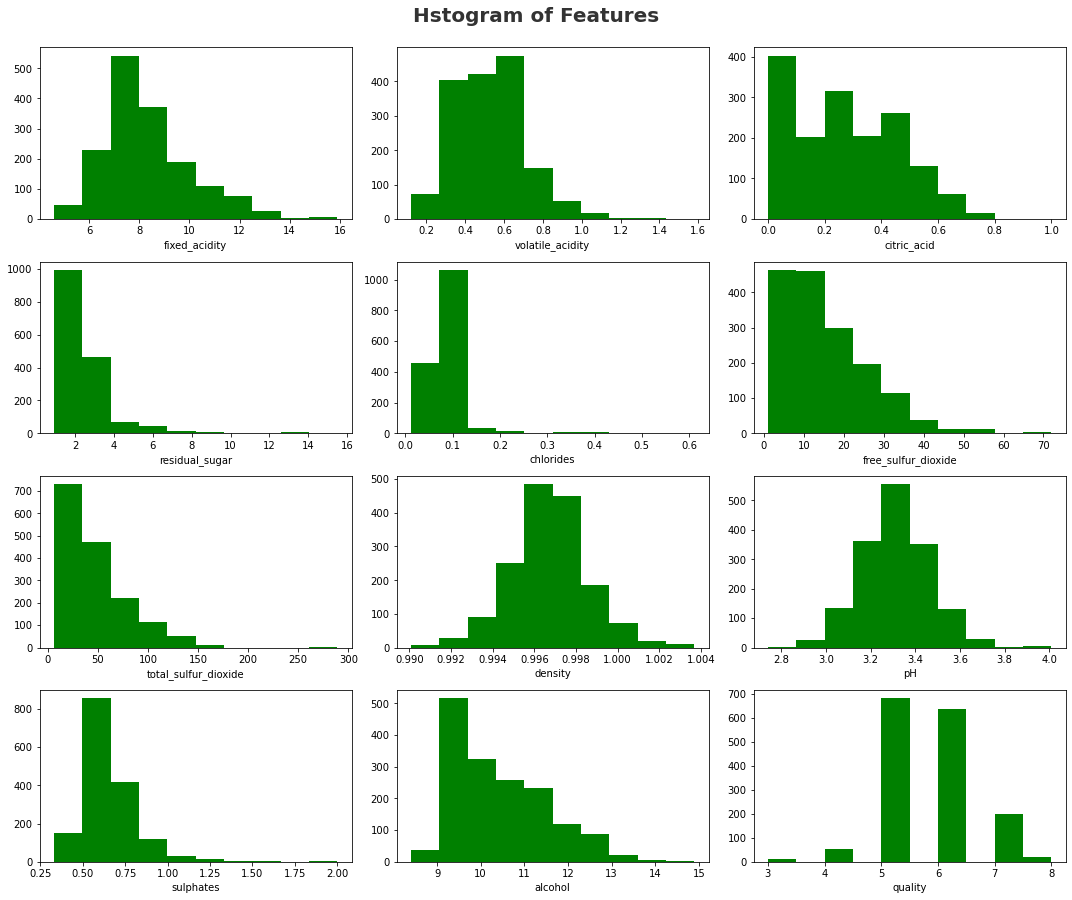

In [15]:
plt.figure(figsize=(15, 15))
plt.suptitle('Hstogram of Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(df.columns)):
    plt.subplot(5, 3, i+1)
    plt.hist(x = df[df.columns[i]] , color = 'g')
    plt.xlabel(df.columns[i])
    plt.tight_layout()

__Observations:__  
The distribution of the attribute “alcohol” seems to be positively skewed i.e the curve is shifted towards the left. The attributes 'density' and 'pH' are quite normally distributed.  
Now looking at the attribute quality, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than wines with bad(1-4) or good(8-10) quality.

### Pairplot 

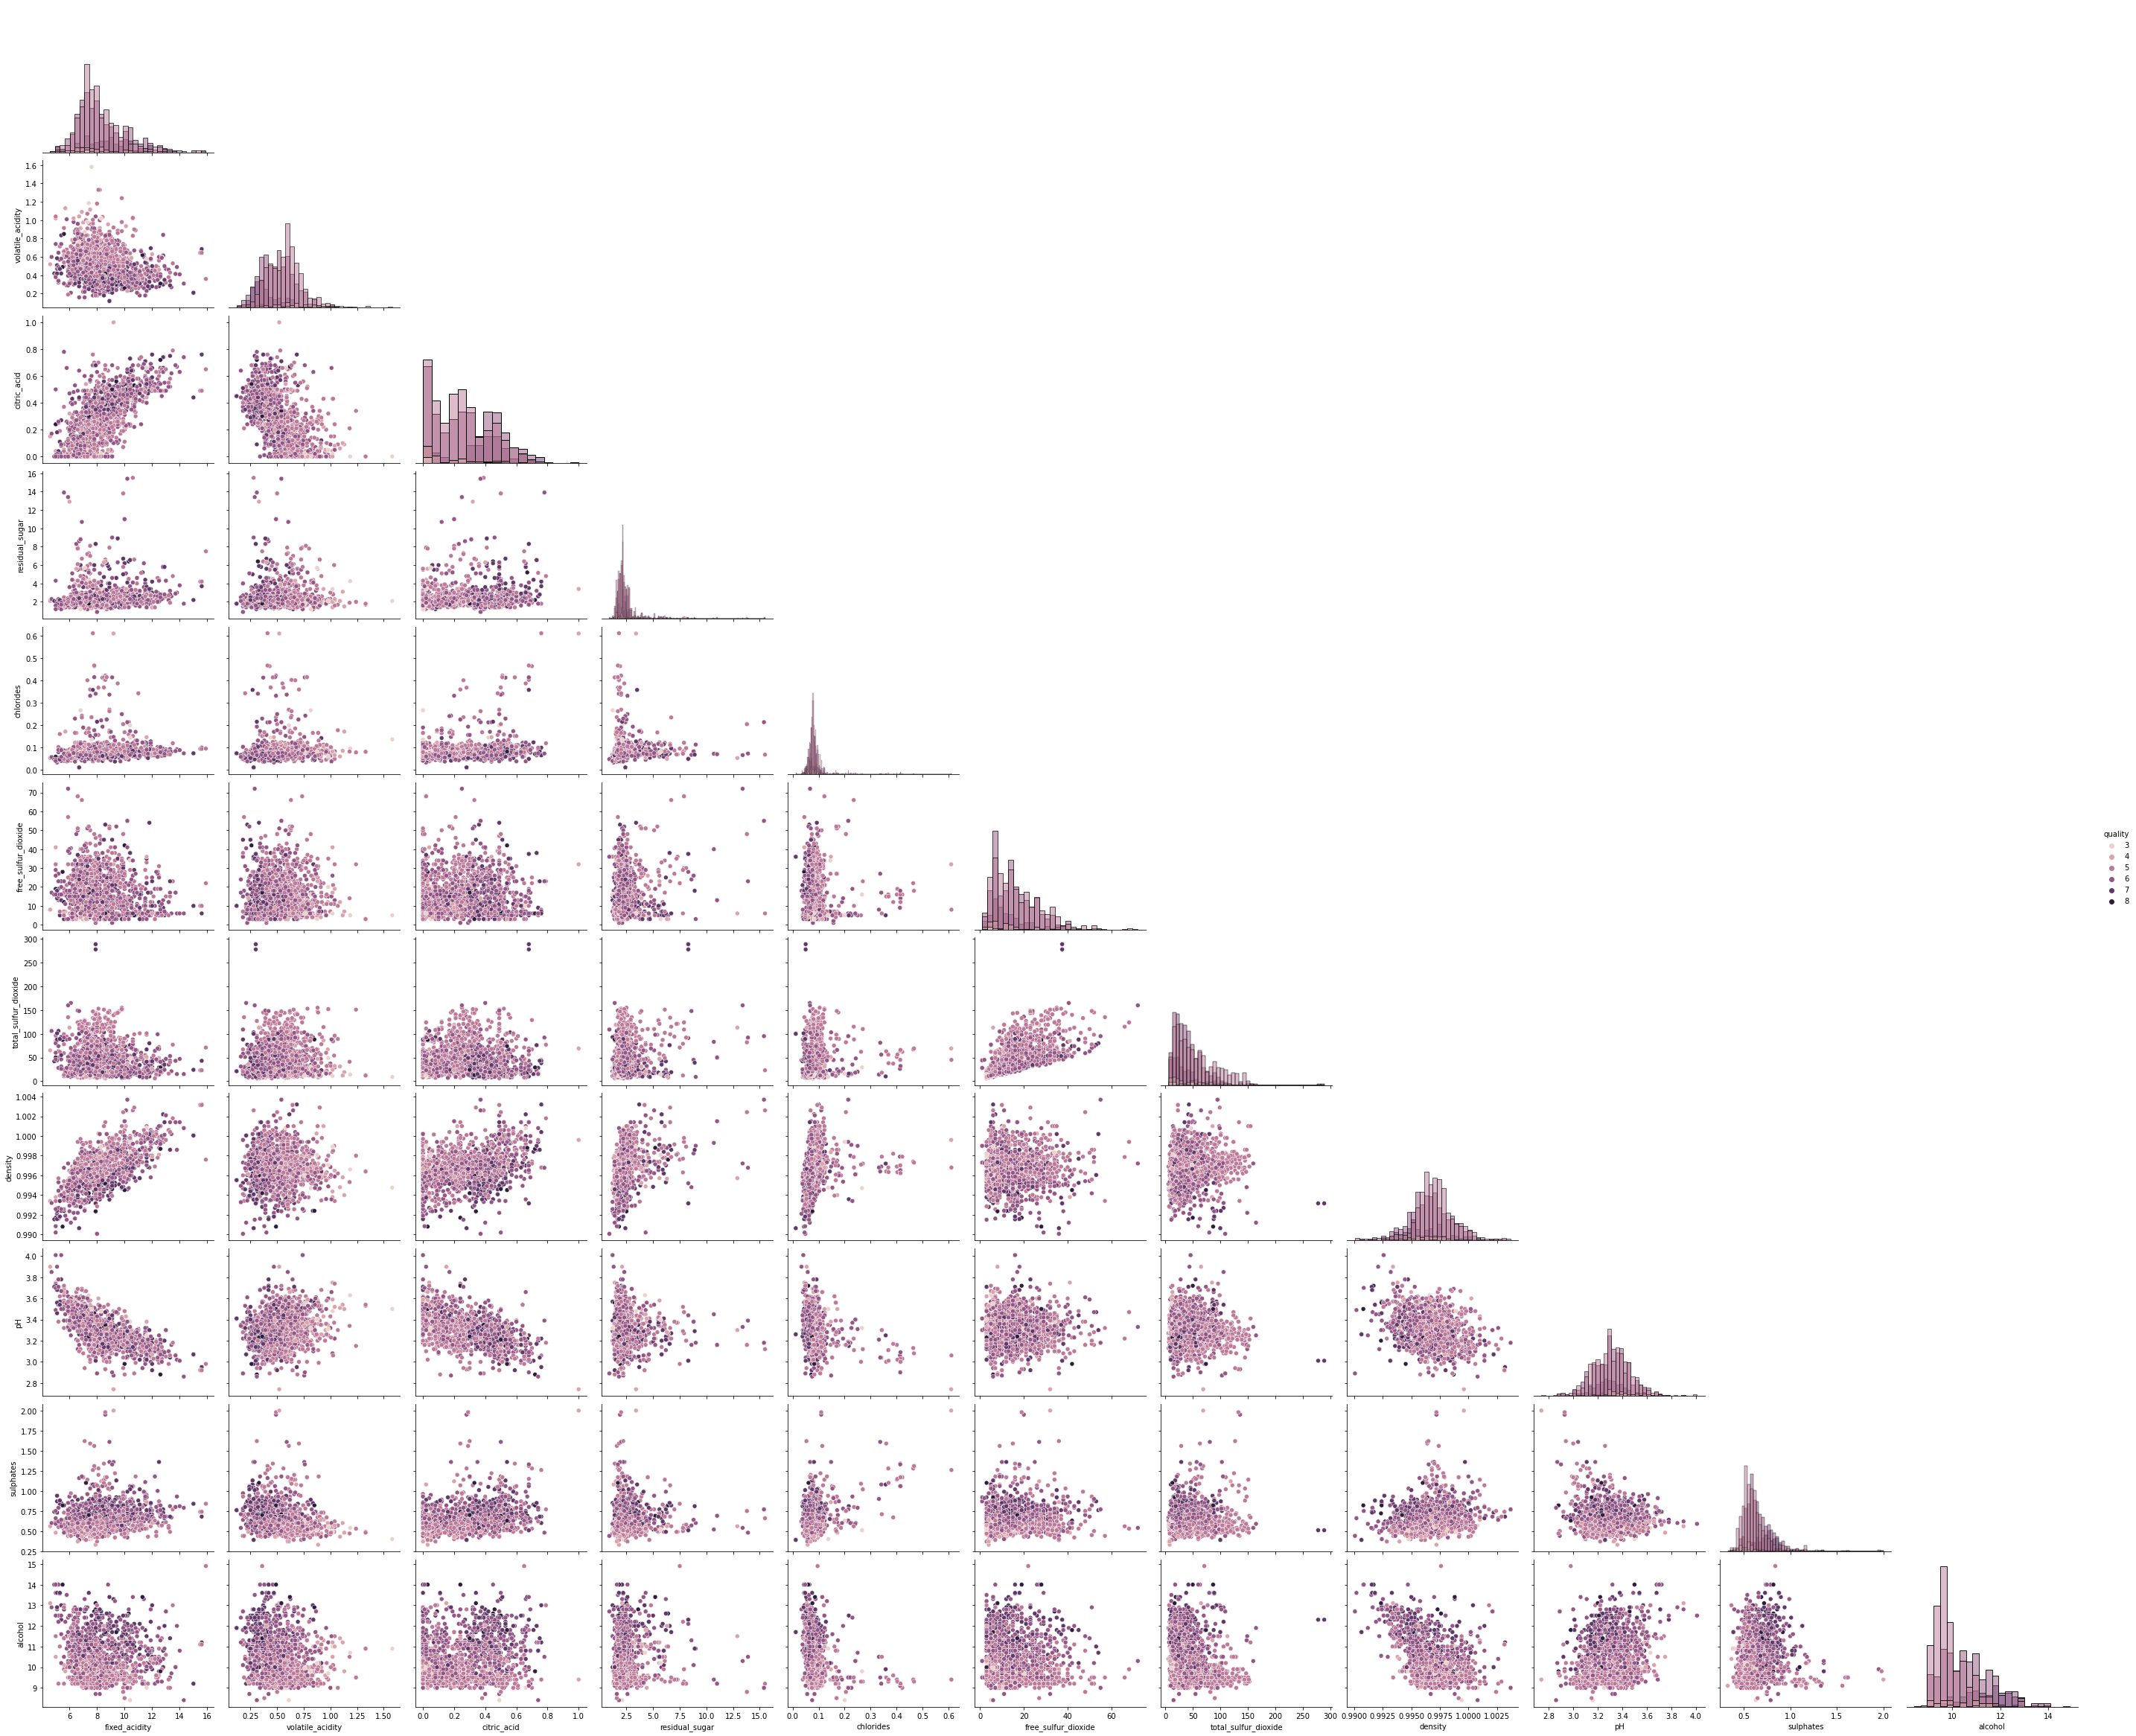

In [16]:
sns.pairplot(df, diag_kind = "hist", hue = "quality", height = 3, aspect = 1.2, corner = True)

We see here that there is correlation between some variables. And this is what we don't want. This problem is called 'multicollinearity'  
#### Heatmap for multicollinearity

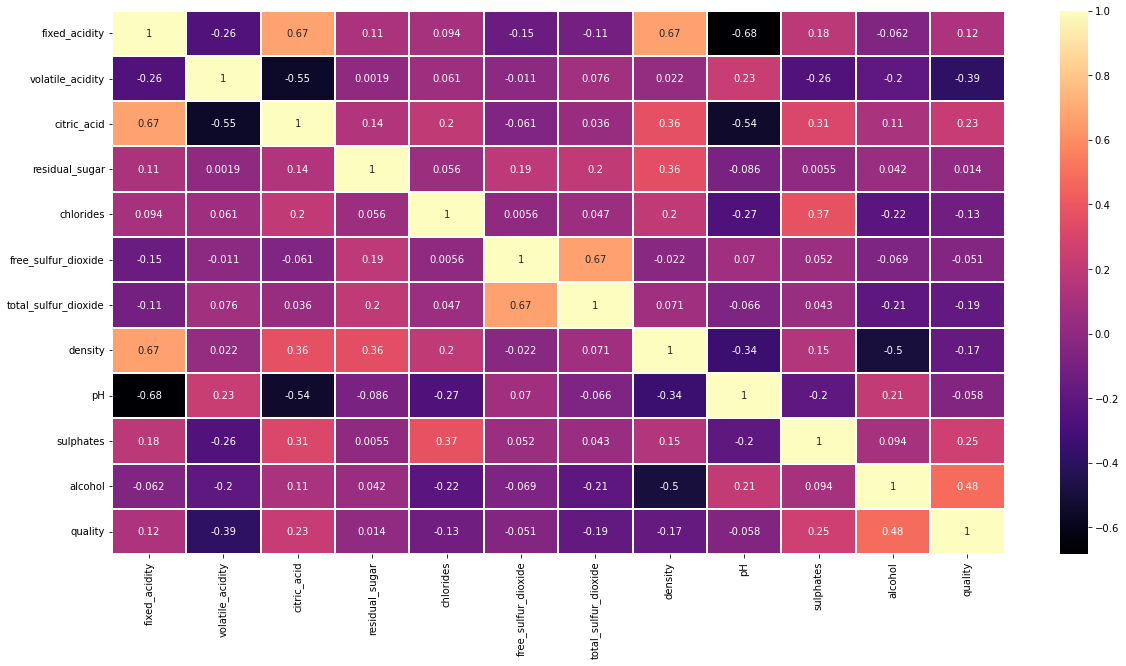

In [17]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = "magma");

In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
colors = ['#FC4F4F', '#FFBC80', '#FF9F45', '#F76E11', '#CD104D', '#820000']
quality = [3,4,5,6,7,8]
fig = make_subplots(rows = 1, cols = 2, specs = [[{"type": "pie"}, {"type": "bar"}]])
fig.add_trace(go.Pie(values = df.quality.value_counts(), labels = df.quality.value_counts().index, domain = dict(x=[0, 0.5]), 
                     marker = dict(colors = colors), hole = .3, name=''), row = 1, col = 1)
fig.add_trace(go.Bar(x = df.quality.value_counts().index, y = df.quality.value_counts(), name='', marker = dict(color = quality,
                     colorscale = colors)), row = 1, col = 2)
fig.update_layout(showlegend = False)
fig.show()

### Outliers

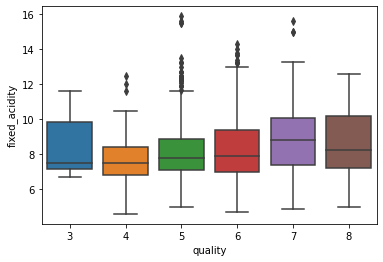

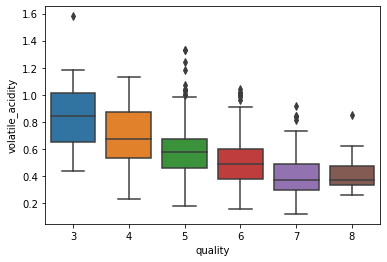

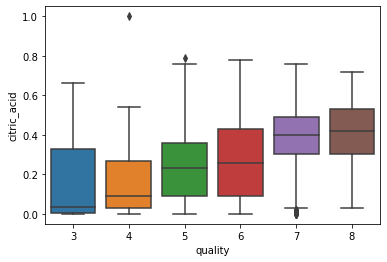

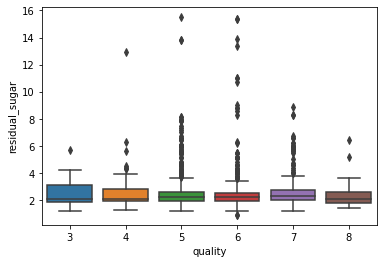

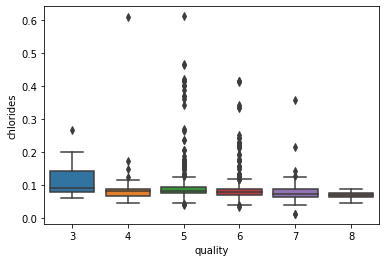

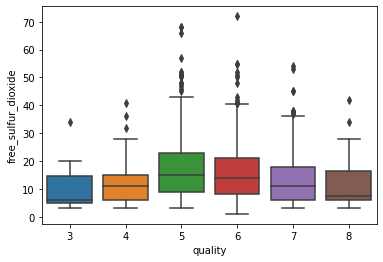

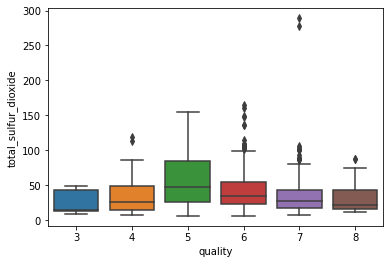

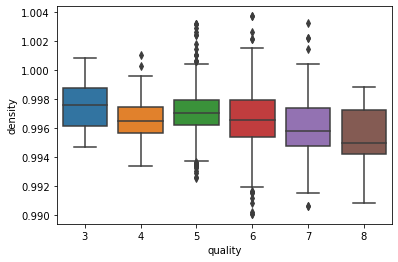

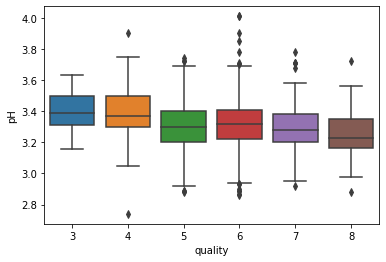

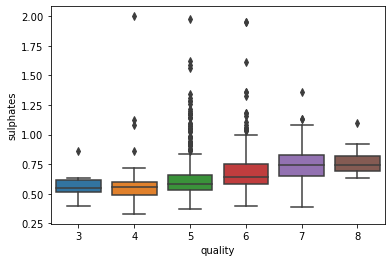

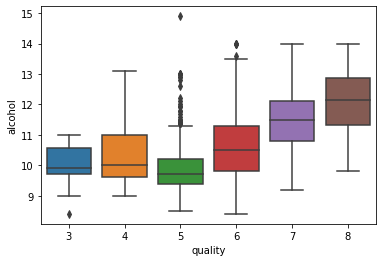

In [19]:
for i in df.columns:
    if i =="quality":
        break
    sns.boxplot("quality",i,data=df)
    plt.show()

# 5. Data Preprocessing

### selecting dependent and independent columns

In [20]:
# we select dependent variable (label)
y = df["quality"]

# we select independent variable
x = df.drop("quality", axis = 1)

### Splitting training and test data

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 15)

In [22]:
print("shape of train input data:",x_train.shape,"\n shape of train output data",y_train.shape,
      "\nshape of test input data ",x_test.shape,"\nshape of test output data",y_test.shape)

shape of train input data: (1199, 11) 
 shape of train output data (1199,) 
shape of test input data  (400, 11) 
shape of test output data (400,)


### Feature scaling

In [23]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [24]:
x_train_scaled, x_test_scaled = scaler_standard(x_train, x_test)

In [25]:
x_train_scaled

array([[-0.08984359,  0.37434335, -1.41618799, ...,  1.26371731,
        -0.0589426 , -1.06214829],
       [-0.03317738,  0.20506646, -0.28926993, ...,  0.41840095,
        -0.23984409, -0.87351189],
       [ 1.32681172, -0.52846674,  0.58153039, ..., -2.70276713,
        -0.96345004, -0.77919369],
       ...,
       [-0.37317466, -0.07706169,  0.01807136, ...,  0.74352263,
         0.48376186, -1.1564665 ],
       [-0.31650845,  0.6564715 , -0.90395251, ...,  0.41840095,
         0.18225938, -0.30760268],
       [-1.56316512,  0.54362024, -1.26251735, ...,  2.30410667,
        -0.23984409, -0.30760268]])

In [26]:
x_test_scaled

array([[-0.82650436,  1.36179189, -0.49416412, ...,  0.61347396,
        -0.36044508, -0.11896627],
       [-0.03317738,  1.33357907,  0.06929491, ...,  0.93859563,
         0.12195888,  1.01285215],
       [-0.65650572,  0.54362024, -1.36496444, ...,  0.09327928,
        -0.90314954,  1.29580676],
       ...,
       [ 1.04348066, -1.65697935,  0.47908329, ..., -0.49193974,
        -1.02375053, -1.06214829],
       [-0.59983951, -1.14914868, -0.23804638, ...,  0.80854696,
        -0.23984409, -0.30760268],
       [ 0.25015368,  0.37434335, -0.49416412, ..., -1.07715875,
        -0.72224806, -0.96783009]])

##### Variance Inflation Factor

In [27]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_train_scaled,i) for i in range(x_train_scaled.shape[1])]
vif["Features"] = x_train.columns

#let's check the values
vif

vif              Features
0   8.214155         fixed_acidity
1   1.800195      volatile_acidity
2   3.300791           citric_acid
3   1.642138        residual_sugar
4   1.598401             chlorides
5   1.910315   free_sulfur_dioxide
6   2.143245  total_sulfur_dioxide
7   6.385594               density
8   3.403990                    pH
9   1.512904             sulphates
10  2.931158               alcohol

# 6. ML  Model : Support Vector Classifier

In [28]:
from sklearn.svm import SVC
svc_model=SVC()

In [29]:
svc_model.fit(x_train_scaled,y_train)

SVC()

### model score

In [30]:
svc_model.score(x_train_scaled,y_train)

0.6755629691409508

### Saving the model

In [31]:
import pickle
# Writing different model files to file
with open( 'svc_modelForPrediction.sav', 'wb') as f:
    pickle.dump(svc_model,f)

## Prediction

In [32]:
y_pred = svc_model.predict(x_test_scaled)

In [33]:
y_pred

array([5, 6, 6, 6, 6, 5, 7, 6, 5, 6, 7, 5, 6, 6, 5, 7, 5, 6, 6, 6, 6, 5,
       6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 7,
       5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6,
       7, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6,
       5, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 7, 5, 6,
       5, 7, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6,
       5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 7, 6, 6, 5, 5, 6, 6, 5, 6, 7,
       5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 7, 5, 6, 5, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6,
       6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 7, 5, 6, 6, 7, 6, 5, 6, 6, 6, 6, 6,
       5, 5, 5, 5, 6, 7, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5,
       6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 6, 5, 5, 5, 7, 5,
       6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6,

## Performence Metrics

In [34]:
# Accuracy score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6225

In [35]:
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print("SVC ")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

SVC 
Accuracy Score value: 0.6225
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        14
           5       0.63      0.78      0.69       163
           6       0.63      0.65      0.64       171
           7       0.50      0.26      0.34        43
           8       0.00      0.00      0.00         5

    accuracy                           0.62       400
   macro avg       0.29      0.28      0.28       400
weighted avg       0.58      0.62      0.59       400



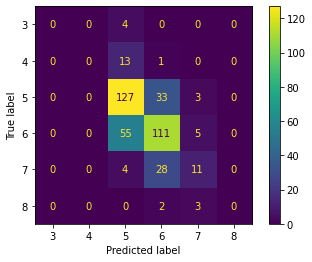

In [36]:
svc_cm = ConfusionMatrixDisplay.from_estimator(svc_model, x_test_scaled, y_test)

__observation:__   
    The accuracy of our model is __62.25%__.

## Hyperparameter Tuning

### Grid Search CV

In [41]:
#parameters
param= {'C':[1.5,1.6,2,2.5],
       'kernel':["linear","rbf"],
       'gamma':[0.1,0.5,0.6,1]}

In [42]:
grid_svc= GridSearchCV(svc_model, param_grid=param, scoring='accuracy', cv=5)
grid_svc.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.5, 1.6, 2, 2.5], 'gamma': [0.1, 0.5, 0.6, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

### Best parameters

In [43]:
grid_svc.best_params_

{'C': 1.6, 'gamma': 1, 'kernel': 'rbf'}

### Using the best parameters and creating new model

In [44]:
svc_model2=SVC(C= 1.6, gamma= 1, kernel='rbf')
svc_model2.fit(x_train_scaled,y_train)

SVC(C=1.6, gamma=1)

In [45]:
# new predictions 
y_pred_new=svc_model2.predict(x_test_scaled)
y_pred_new

array([5, 5, 5, 6, 7, 6, 7, 6, 5, 6, 6, 5, 6, 6, 5, 7, 5, 5, 5, 7, 5, 5,
       6, 7, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 7,
       5, 5, 5, 6, 6, 6, 5, 7, 5, 6, 6, 5, 5, 5, 5, 7, 5, 5, 5, 6, 5, 6,
       7, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5,
       5, 7, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 8, 6, 6, 5, 6, 6, 6, 5,
       5, 7, 5, 5, 6, 5, 7, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5,
       5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 7, 5, 6, 5,
       6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 7, 7, 6, 5, 5, 6, 5, 5, 7, 7,
       6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 7, 5, 6, 6, 6, 5, 5, 6, 7, 6, 6, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5,
       6, 6, 7, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 7, 5, 5, 5, 5, 5, 7, 6,
       5, 5, 5, 5, 5, 6, 6, 5, 5, 7, 5, 5, 5, 6, 5,

In [46]:
print("Accuracy Score:",accuracy_score(y_pred_new,y_test))
print("Classification Report:\n",classification_report(y_pred_new,y_test))
print("Confusion Matrix:\n",confusion_matrix(y_pred_new,y_test))

Accuracy Score: 0.6475
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.79      0.65      0.71       199
           6       0.64      0.65      0.64       168
           7       0.49      0.66      0.56        32
           8       0.00      0.00      0.00         1

    accuracy                           0.65       400
   macro avg       0.32      0.33      0.32       400
weighted avg       0.70      0.65      0.67       400

Confusion Matrix:
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  3   8 129  52   6   1]
 [  1   6  34 109  15   3]
 [  0   0   0  10  21   1]
 [  0   0   0   0   1   0]]


__observation:__  
    We are able to Increase the accuracy of our model from __62.25%__ to __64.75%__ by Hyperparameter Tuning the model
    
## Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [29]:
# Prediction
y_pred_dt = dt_model.predict(x_test_scaled)

In [30]:
accuracy_dt = accuracy_score(y_test,y_pred_dt)
accuracy_dt

0.6025

In [31]:
score2 = accuracy_score(y_test,y_pred_dt)
cr = classification_report(y_test,y_pred_dt)

print("Decision Tree Classifier")
print ("Accuracy Score value: {:.4f}".format(score2))
print (cr)

Decision Tree Classifier
Accuracy Score value: 0.6025
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.11      0.07      0.09        14
           5       0.67      0.76      0.71       163
           6       0.64      0.56      0.59       171
           7       0.41      0.49      0.45        43
           8       0.00      0.00      0.00         5

    accuracy                           0.60       400
   macro avg       0.31      0.31      0.31       400
weighted avg       0.59      0.60      0.60       400



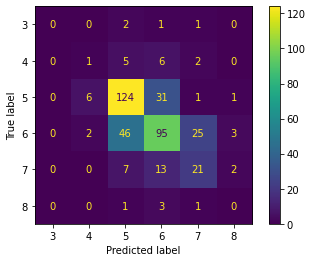

In [32]:
dt_cm = ConfusionMatrixDisplay.from_estimator(dt_model, x_test_scaled, y_test)

### Hyper param tuning the DT model

In [45]:
param = {'splitter' : ['best', 'random'],
'criterion' : ['gini', 'entropy'],
'max_depth': [4,5,6,7,8],
'min_samples_split': [4,5,6,7,8,9,10],
'min_samples_leaf': [3,4,5,6,7,8,9,10]
}

In [53]:
grid_dt= GridSearchCV(estimator=dt_model, param_grid=param, cv=3)
grid_dt.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [54]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 9,
 'min_samples_split': 6,
 'splitter': 'random'}

In [55]:
dt_model_hyper = DecisionTreeClassifier(criterion='entropy',max_depth= 6,min_samples_leaf= 9,min_samples_split= 6,splitter= 'random')

In [56]:
dt_model_hyper.fit(x_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=9,
                       min_samples_split=6, splitter='random')

In [57]:
y_pred_dt_hyper = dt_model_hyper.predict(x_test_scaled)

In [58]:
accuracy_dt_hyper = accuracy_score(y_test,y_pred_dt_hyper)
accuracy_dt_hyper

0.585

## Decision Tree Visualization

[Text(0.7333333333333333, 0.9285714285714286, 'X[10] <= 2.076\nentropy = 1.706\nsamples = 1199\nvalue = [6, 39, 518, 467, 156, 13]'),
 Text(0.5555555555555556, 0.7857142857142857, 'X[1] <= 1.825\nentropy = 1.665\nsamples = 1146\nvalue = [6, 38, 512, 447, 135, 8]'),
 Text(0.35555555555555557, 0.6428571428571429, 'X[10] <= 0.364\nentropy = 1.627\nsamples = 1092\nvalue = [2, 28, 481, 438, 135, 8]'),
 Text(0.17777777777777778, 0.5, 'X[0] <= 0.257\nentropy = 1.405\nsamples = 774\nvalue = [2, 20, 432, 277, 41, 2]'),
 Text(0.08888888888888889, 0.35714285714285715, 'X[6] <= 2.322\nentropy = 1.266\nsamples = 527\nvalue = [0, 14, 321, 176, 15, 1]'),
 Text(0.044444444444444446, 0.21428571428571427, 'X[10] <= -0.121\nentropy = 1.294\nsamples = 498\nvalue = [0, 14, 294, 174, 15, 1]'),
 Text(0.022222222222222223, 0.07142857142857142, 'entropy = 1.241\nsamples = 397\nvalue = [0, 12, 251, 124, 9, 1]'),
 Text(0.06666666666666667, 0.07142857142857142, 'entropy = 1.381\nsamples = 101\nvalue = [0, 2, 43, 

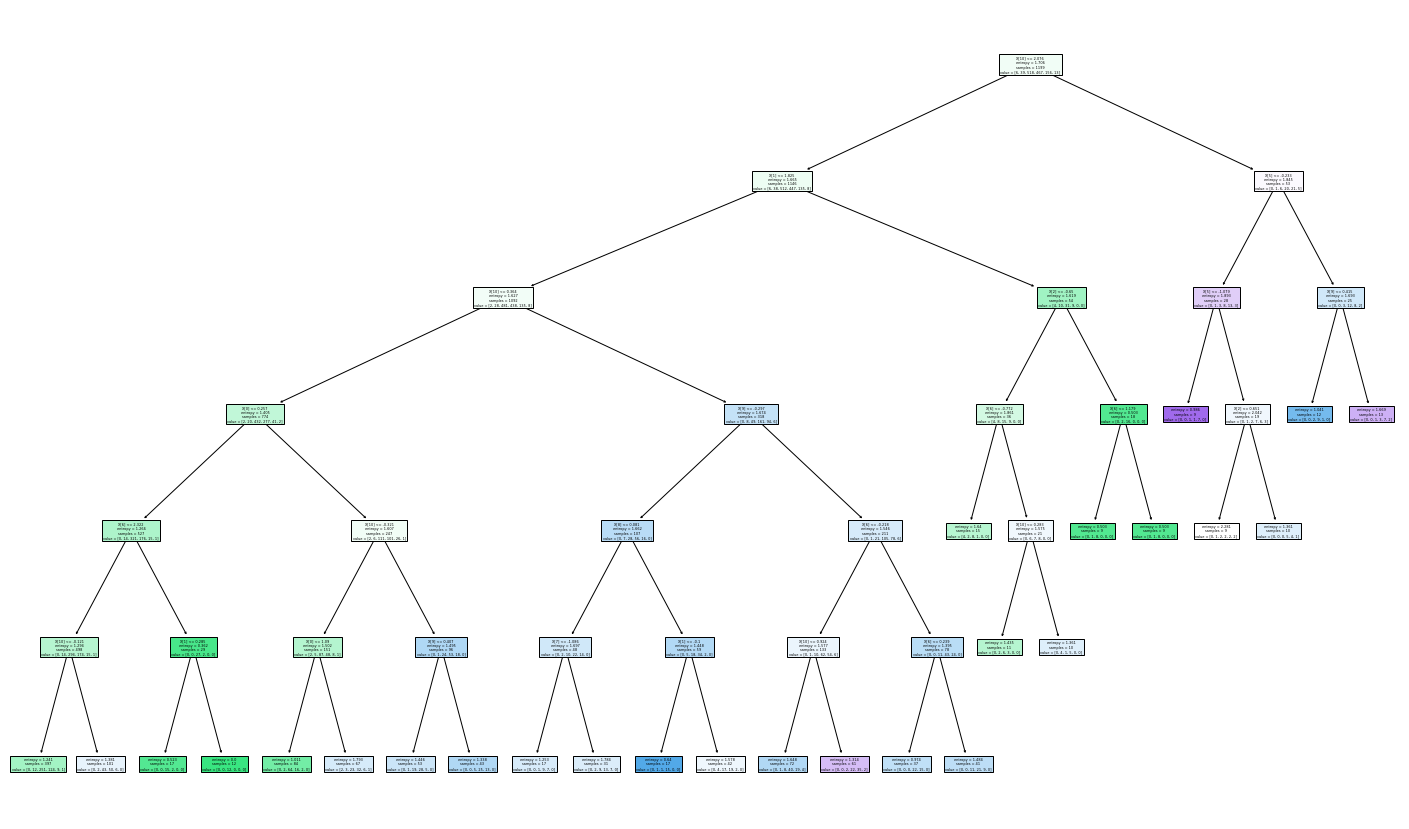

In [59]:
from sklearn import tree
fig = plt.figure(figsize=(25,15))
tree.plot_tree(dt_model_hyper,filled = True)

gini impurity ==> Binary classificatiion

# saving tree

In [60]:
fig.savefig("descision Tree hypertuned")

## Random Forest 


In [61]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier()

In [62]:
RF_model.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [63]:
y_predict_rf = RF_model.predict(x_test_scaled)

In [64]:
# Metrics
score2 = accuracy_score(y_test,y_predict_rf)
cr = classification_report(y_test,y_predict_rf)

print("Random Forest Classifier")
print ("Accuracy Score value: {:.4f}".format(score2))
print (cr)

Random Forest Classifier
Accuracy Score value: 0.6700
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        14
           5       0.67      0.82      0.74       163
           6       0.70      0.64      0.67       171
           7       0.56      0.56      0.56        43
           8       0.00      0.00      0.00         5

    accuracy                           0.67       400
   macro avg       0.32      0.34      0.33       400
weighted avg       0.63      0.67      0.65       400



#### Hyperparameter tuning RF Classifier

In [49]:
grid_param = {
    "n_estimators": [90,100,115,130],
    "criterion" : ['gini' , 'entropy'],
    "max_depth" : range(2,20,1),
    "min_samples_leaf" : range(1,10,1),
    "min_samples_split" : range(2,10,1),
    "max_features" : ['auto','log2']
}

In [ ]:
grid_rf= GridSearchCV(estimator=RF_model, param_grid=grid_param, cv=3,verbose = 2,n_jobs=-1)
grid_rf.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 20736 candidates, totalling 62208 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=2)

In [ ]:
grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 90}

In [ ]:
# model with best parameters: 
rf_model_hyper = RandomForestClassifier(criterion= 'entropy',max_depth= 17,max_features= 'log2',min_samples_leaf= 1,min_samples_split= 3,n_estimators= 90)

In [ ]:
rf_model_hyper.fit(x_train_scaled,y_train)
#predict
y_pred_rf_hyper = rf_model_hyper.predict(x_test_scaled)

In [ ]:
# Metrics
score = accuracy_score(y_test,y_pred_rf_hyper)
cr = classification_report(y_test,y_pred_rf_hyper)

print("Random Forest Classifier Hypertuned")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest Classifier Hypertuned
Accuracy Score value: 0.6875
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        14
           5       0.69      0.83      0.75       163
           6       0.71      0.68      0.69       171
           7       0.62      0.56      0.59        43
           8       0.00      0.00      0.00         5

    accuracy                           0.69       400
   macro avg       0.34      0.34      0.34       400
weighted avg       0.65      0.69      0.67       400



## Bagging Model

In [50]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

bagging_model_svc = BaggingClassifier(base_estimator =SVC(),n_estimators = 50,random_state = 0).fit(x_train_scaled,y_train)

In [51]:
y_pred_bagging = bagging_model_svc.predict(x_test_scaled)

In [52]:
# Metrics
score = accuracy_score(y_test,y_pred_bagging)
cr = classification_report(y_test,y_pred_bagging)

print("Bagging Classifier SVC")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Bagging Classifier SVC
Accuracy Score value: 0.6225
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        14
           5       0.63      0.79      0.70       163
           6       0.64      0.64      0.64       171
           7       0.48      0.26      0.33        43
           8       0.00      0.00      0.00         5

    accuracy                           0.62       400
   macro avg       0.29      0.28      0.28       400
weighted avg       0.58      0.62      0.59       400



Conslusion: 
The model with best accuracy is Hypertuned Random Forest Classifier Model with an Accuracy of 68.75%

#### Performed By:  Ankit Dubey

## Boosting- ADABOOST


In [53]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier()

In [54]:
adaboost_model.fit(x_train_scaled,y_train)

AdaBoostClassifier()

In [55]:
y_pred_ada = adaboost_model.predict(x_test_scaled)

In [56]:
# Metrics
score = accuracy_score(y_test,y_pred_ada)
cr = classification_report(y_test,y_pred_ada)

print("Adaboost Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Adaboost Classifier
Accuracy Score value: 0.5550
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        14
           5       0.56      0.87      0.68       163
           6       0.56      0.47      0.51       171
           7       0.00      0.00      0.00        43
           8       0.00      0.00      0.00         5

    accuracy                           0.56       400
   macro avg       0.19      0.22      0.20       400
weighted avg       0.47      0.56      0.50       400



## Hyperparameter tuning Adabooost

In [55]:
grid_param = {
    "n_estimators": [90,100,110,120,130,150],
    "learning_rate":[0.001,0.01,0.1,0.005,0.02,0.03]
}

In [56]:
grid_ada= GridSearchCV(estimator=adaboost_model, param_grid=grid_param, cv=3,verbose = 2,n_jobs=-1)
grid_ada.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.005, 0.02, 0.03],
                         'n_estimators': [90, 100, 110, 120, 130, 150]},
             verbose=2)

In [57]:
grid_ada.best_params_

{'learning_rate': 0.02, 'n_estimators': 150}

In [58]:
# model with best parameters: 
ada_model_hyper =AdaBoostClassifier(learning_rate=0.02,n_estimators=150)

In [59]:
ada_model_hyper.fit(x_train_scaled,y_train)
#predict
y_pred_ada_hyper = ada_model_hyper.predict(x_test_scaled)

In [60]:
# Metrics
score = accuracy_score(y_test,y_pred_ada_hyper)
cr = classification_report(y_test,y_pred_ada_hyper)

print("Random Forest Classifier Hypertuned")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest Classifier Hypertuned
Accuracy Score value: 0.5875
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        14
           5       0.63      0.72      0.67       163
           6       0.55      0.68      0.61       171
           7       0.00      0.00      0.00        43
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.20      0.23      0.21       400
weighted avg       0.49      0.59      0.54       400



## Gradient Boost

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

In [68]:
gb_model.fit(x_train_scaled,y_train)

GradientBoostingClassifier()

In [69]:
y_pred_gb = gb_model.predict(x_test_scaled)

In [70]:
# Metrics
score = accuracy_score(y_test,y_pred_gb)
cr = classification_report(y_test,y_pred_gb)

print("Gradient Boost Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Gradient Boost Classifier
Accuracy Score value: 0.6300
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        14
           5       0.66      0.80      0.72       163
           6       0.64      0.59      0.62       171
           7       0.49      0.49      0.49        43
           8       0.00      0.00      0.00         5

    accuracy                           0.63       400
   macro avg       0.30      0.31      0.30       400
weighted avg       0.60      0.63      0.61       400



## Hyper PArameter Tuning

In [71]:
grid_param = {
    "n_estimators": [90,100,110,120,130,150],
    "learning_rate":[0.001,0.01,0.005,0.02,0.03],
    "max_depth" : range(2,14,2),
    "min_samples_leaf" : range(1,10,2)
}

In [72]:
grid_gb= GridSearchCV(estimator=gb_model, param_grid=grid_param, cv=3,verbose = 2,n_jobs=-1)
grid_gb.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.005, 0.02, 0.03],
                         'max_depth': range(2, 14, 2),
                         'min_samples_leaf': range(1, 10, 2),
                         'n_estimators': [90, 100, 110, 120, 130, 150]},
             verbose=2)

In [73]:
grid_gb.best_params_

{'learning_rate': 0.02,
 'max_depth': 8,
 'min_samples_leaf': 5,
 'n_estimators': 100}

In [74]:
# model with best parameters: 
gb_model_hyper =GradientBoostingClassifier(learning_rate=0.02,max_depth=8,min_samples_leaf=5,n_estimators=100)

In [75]:
gb_model_hyper.fit(x_train_scaled,y_train)
#predict
y_pred_gb_hyper = gb_model_hyper.predict(x_test_scaled)

In [76]:
# Metrics
score = accuracy_score(y_test,y_pred_gb_hyper)
cr = classification_report(y_test,y_pred_gb_hyper)

print("Random Forest Classifier Hypertuned")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest Classifier Hypertuned
Accuracy Score value: 0.6525
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.50      0.07      0.12        14
           5       0.67      0.83      0.74       163
           6       0.68      0.58      0.63       171
           7       0.53      0.56      0.55        43
           8       0.00      0.00      0.00         5

    accuracy                           0.65       400
   macro avg       0.40      0.34      0.34       400
weighted avg       0.64      0.65      0.63       400



## XgBoost

In [62]:
import xgboost
xgb_model = xgboost.XGBClassifier()

In [63]:
xgb_model.fit(x_train_scaled,y_train)

XGBClassifier(objective='multi:softprob')

In [64]:
y_pred_xgb=xgb_model.predict(x_test_scaled)

In [65]:
# Metrics
score = accuracy_score(y_test,y_pred_xgb)
cr = classification_report(y_test,y_pred_xgb)

print("XG Boost Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

XG Boost Classifier
Accuracy Score value: 0.6300
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        14
           5       0.66      0.80      0.72       163
           6       0.64      0.61      0.62       171
           7       0.46      0.42      0.44        43
           8       0.00      0.00      0.00         5

    accuracy                           0.63       400
   macro avg       0.29      0.30      0.30       400
weighted avg       0.59      0.63      0.61       400



## Hyper Parameter Tuning using Optuna

In [67]:
# first install optuna
!pip install optuna

     ------------------------------------ 348.5/348.5 kB 204.2 kB/s eta 0:00:00
     ------------------------------------ 209.8/209.8 kB 202.8 kB/s eta 0:00:00
     -------------------------------------- 81.0/81.0 kB 566.3 kB/s eta 0:00:00
     -------------------------------------- 78.7/78.7 kB 877.3 kB/s eta 0:00:00
     -------------------------------------- 50.0/50.0 kB 846.3 kB/s eta 0:00:00
     -------------------------------------- 147.1/147.1 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 95.2/95.2 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 112.6/112.6 kB 819.0 kB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=914d3bf1b8501e85c30842d36556ddeb66da6d957b16466d1846ec44b972302c
  Stored in directory: c:\users\bolt0\appdata\local\pip\cache\wheels\23\12\dd\067d543d895c9036459c68b0

In [69]:
# NOw we import optuna and hypertune the model
import optuna
def objective_classification(trial,data=x,target=y) :
    train_x , test_x , train_y , test_y= train_test_split(data , target , test_size = .20 ,random_state=10)
    
    
    param  = {
        'tree_method' :'gpu_hist',
        'verbosity' : 3,
        'objective' : "binary:logistics" , 
        'booster' : trial.suggest_categorical('booster' , ['dart' , 'gbtree','gblinear']),
        'lambda' : trial.suggest_float('lambda' , 1e-4 , 1),
        'alpha' :trial.suggest_float('alpha' , 1e-4 , 1),
        'subsample' : trial.suggest_float('subsample' , .1,.5),
        'colsample_bytree' : trial.suggest_float('colsample_bytree' , .1 ,.5)
        
    }
   
    if param['booster'] in ['gbtree' , 'dart']:
        param['gamma'] :trial.suggest_float('gamma' , 1e-3 , 4 )
        param['eta'] : trial.suggest_float('eta' , .001 ,5 )
        
    xgb_classification = xgboost.XGBClassifier(**param)
    xgb_classification.fit(train_x , train_y,eval_set  = [(test_x, test_y)])
    pred = xgb_classification.predict(test_x)
    accuracy  = xgb_classification.score(test_x , test_y)

    
    
    return accuracy

In [71]:
xgb_classification_oputuna = optuna.create_study()

[I 2022-12-10 02:22:15,584] A new study created in memory with name: no-name-5f67ca9c-795a-4a37-b43d-5d9e85efe150


In [72]:
xgb_classification_oputuna.optimize(objective_classification , n_trials = 10 )

[0]	validation_0-merror:0.55625
[1]	validation_0-merror:0.528125
[2]	validation_0-merror:0.521875
[3]	validation_0-merror:0.49375
[4]	validation_0-merror:0.4875
[5]	validation_0-merror:0.484375
[6]	validation_0-merror:0.465625
[7]	validation_0-merror:0.446875
[8]	validation_0-merror:0.45625
[9]	validation_0-merror:0.453125
[10]	validation_0-merror:0.459375
[11]	validation_0-merror:0.45
[12]	validation_0-merror:0.45625
[13]	validation_0-merror:0.453125
[14]	validation_0-merror:0.45
[15]	validation_0-merror:0.45
[16]	validation_0-merror:0.44375
[17]	validation_0-merror:0.45
[18]	validation_0-merror:0.459375
[19]	validation_0-merror:0.459375
[20]	validation_0-merror:0.45
[21]	validation_0-merror:0.45
[22]	validation_0-merror:0.440625
[23]	validation_0-merror:0.440625
[24]	validation_0-merror:0.43125
[25]	validation_0-merror:0.440625
[26]	validation_0-merror:0.428125
[27]	validation_0-merror:0.43125
[28]	validation_0-merror:0.428125
[29]	validation_0-merror:0.428125
[30]	validation_0-merro

[I 2022-12-10 02:22:19,930] Trial 0 finished with value: 0.6125 and parameters: {'booster': 'gbtree', 'lambda': 0.7954335478455026, 'alpha': 0.2138605466089403, 'subsample': 0.1088126153482954, 'colsample_bytree': 0.24374914252845123}. Best is trial 0 with value: 0.6125.


[02:22:19] ======== Monitor: Learner ========
[02:22:19] EvalOneIter: 0.0078156s, 100 calls @ 78us
[02:22:19] GetGradient: 0.0078202s, 100 calls @ 78us
[02:22:19] PredictRaw: 0.0040147s, 100 calls @ 40us
[02:22:19] UpdateOneIter: 3.1301s, 100 calls @ 31300us
[02:22:19] ======== Monitor: GBTree ========
[02:22:19] BoostNewTrees: 3.10357s, 100 calls @ 31035us
[02:22:19] CommitModel: 0.0143056s, 100 calls @ 143us
[02:22:19] ======== Monitor:  ========
[02:22:19] DevicePredictInternal: 0.0146549s, 202 calls @ 72us
[02:22:19] PredictFromCache: 0.0049926s, 199 calls @ 25us
[02:22:19] ======== Monitor: updater_gpu_hist ========
[02:22:19] BinningCompression: 0.0014242s, 1 calls @ 1424us
[02:22:19] InitData: 0.0094895s, 600 calls @ 15us
[02:22:19] InitDataOnce: 0.0092502s, 1 calls @ 9250us
[02:22:19] Quantiles: 0.0077949s, 1 calls @ 7794us
[02:22:19] Update: 3.06616s, 600 calls @ 5110us
[02:22:19] ======== Monitor: HistCutMatrix ========
[02:22:19] ======== Monitor: DeviceShard0 ========
[02:2

[I 2022-12-10 02:22:22,991] Trial 1 finished with value: 0.575 and parameters: {'booster': 'gbtree', 'lambda': 0.3642026182048604, 'alpha': 0.17954465632130148, 'subsample': 0.1882499257904817, 'colsample_bytree': 0.14471280454348923}. Best is trial 1 with value: 0.575.


[02:22:22] ======== Monitor: Learner ========
[02:22:22] EvalOneIter: 0.0077439s, 100 calls @ 77us
[02:22:22] GetGradient: 0.0072027s, 100 calls @ 72us
[02:22:22] PredictRaw: 0.0042487s, 100 calls @ 42us
[02:22:22] UpdateOneIter: 2.97168s, 100 calls @ 29716us
[02:22:22] ======== Monitor: GBTree ========
[02:22:22] BoostNewTrees: 2.94521s, 100 calls @ 29452us
[02:22:22] CommitModel: 0.0146188s, 100 calls @ 146us
[02:22:22] ======== Monitor:  ========
[02:22:22] DevicePredictInternal: 0.0149781s, 202 calls @ 74us
[02:22:22] PredictFromCache: 0.0052294s, 199 calls @ 26us
[02:22:22] ======== Monitor: updater_gpu_hist ========
[02:22:22] BinningCompression: 0.0003086s, 1 calls @ 308us
[02:22:22] InitData: 0.0026934s, 600 calls @ 4us
[02:22:22] InitDataOnce: 0.0024583s, 1 calls @ 2458us
[02:22:22] Quantiles: 0.0021307s, 1 calls @ 2130us
[02:22:22] Update: 2.90783s, 600 calls @ 4846us
[02:22:22] ======== Monitor: HistCutMatrix ========
[02:22:22] ======== Monitor: DeviceShard0 ========
[02:22

[46]	validation_0-merror:0.409375
[02:22:24] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[47]	validation_0-merror:0.403125
[02:22:24] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[48]	validation_0-merror:0.40625
[02:22:24] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[49]	validation_0-merror:0.40625
[02:22:24] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[50]	validation_0-merror:0.403125
[02:22:24] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[51]	validation_0-merror:0.403125
[02:22:24] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[52]	validation_0-merror:0.409375
[02:22:25] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479

[I 2022-12-10 02:22:27,385] Trial 2 finished with value: 0.6 and parameters: {'booster': 'dart', 'lambda': 0.8061533076793524, 'alpha': 0.015320395202007633, 'subsample': 0.37368806115147957, 'colsample_bytree': 0.37297689080065677}. Best is trial 1 with value: 0.575.


[02:22:27] ======== Monitor: GBTree ========
[02:22:27] BoostNewTrees: 2.99399s, 100 calls @ 29939us
[02:22:27] CommitModel: 0.0120925s, 100 calls @ 120us
[02:22:27] ======== Monitor:  ========
[02:22:27] ======== Monitor: updater_gpu_hist ========
[02:22:27] BinningCompression: 0.0002573s, 1 calls @ 257us
[02:22:27] InitData: 0.002302s, 600 calls @ 3us
[02:22:27] InitDataOnce: 0.0020852s, 1 calls @ 2085us
[02:22:27] Quantiles: 0.0018173s, 1 calls @ 1817us
[02:22:27] Update: 2.95459s, 600 calls @ 4924us
[02:22:27] ======== Monitor: HistCutMatrix ========
[02:22:27] ======== Monitor: DeviceShard0 ========
[02:22:27] AllReduce: 0.0003168s, 2190 calls @ 0us
[02:22:27] BuildHist: 0.113939s, 1590 calls @ 71us
[02:22:27] EvaluateSplits: 0.12332s, 1590 calls @ 77us
[02:22:27] FinalisePosition: 0.0102816s, 600 calls @ 17us
[02:22:27] InitRoot: 2.51304s, 600 calls @ 4188us
[02:22:27] Reset: 0.0911146s, 600 calls @ 151us
[02:22:27] UpdatePosition: 0.0915942s, 1590 calls @ 57us
[02:22:27] =======

[I 2022-12-10 02:22:27,666] Trial 3 finished with value: 0.471875 and parameters: {'booster': 'gblinear', 'lambda': 0.7769791208236323, 'alpha': 0.2372537144784264, 'subsample': 0.38892145385687604, 'colsample_bytree': 0.32336077313371386}. Best is trial 3 with value: 0.471875.


[02:22:27] ======== Monitor: Learner ========
[02:22:27] EvalOneIter: 0.0157485s, 100 calls @ 157us
[02:22:27] GetGradient: 0.0161161s, 100 calls @ 161us
[02:22:27] PredictRaw: 0.0023059s, 100 calls @ 23us
[02:22:27] UpdateOneIter: 0.200717s, 100 calls @ 2007us
[02:22:27] ======== Monitor: GBLinear ========
[02:22:27] DoBoost: 0.181996s, 100 calls @ 1819us
[02:22:27] PredictBatch: 0.0065794s, 202 calls @ 32us
[02:22:27] PredictBatchInternal: 0.0826535s, 203 calls @ 407us
[02:22:27] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[0]	validation_0-merror:0.459375
[02:22:27] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[1]	validation_0-merror:0.45
[02:22:27] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[2]	validation_0-merror:0.415625
[02:22:27] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: dr

[53]	validation_0-merror:0.421875
[02:22:29] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[54]	validation_0-merror:0.41875
[02:22:29] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[55]	validation_0-merror:0.421875
[02:22:29] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[56]	validation_0-merror:0.421875
[02:22:29] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[57]	validation_0-merror:0.425
[02:22:29] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[58]	validation_0-merror:0.41875
[02:22:30] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[59]	validation_0-merror:0.415625
[02:22:30] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: d

[I 2022-12-10 02:22:32,091] Trial 4 finished with value: 0.609375 and parameters: {'booster': 'dart', 'lambda': 0.5901514693996164, 'alpha': 0.2560966308104581, 'subsample': 0.3978681311776202, 'colsample_bytree': 0.3772035259266293}. Best is trial 3 with value: 0.471875.



[02:22:32] EvalOneIter: 0.277578s, 100 calls @ 2775us
[02:22:32] GetGradient: 0.0169708s, 100 calls @ 169us
[02:22:32] PredictRaw: 1.0003s, 100 calls @ 10003us
[02:22:32] UpdateOneIter: 4.04453s, 100 calls @ 40445us
[02:22:32] ======== Monitor: GBTree ========
[02:22:32] BoostNewTrees: 3.01474s, 100 calls @ 30147us
[02:22:32] CommitModel: 0.0121838s, 100 calls @ 121us
[02:22:32] ======== Monitor:  ========
[02:22:32] ======== Monitor: updater_gpu_hist ========
[02:22:32] BinningCompression: 0.0002738s, 1 calls @ 273us
[02:22:32] InitData: 0.0022174s, 600 calls @ 3us
[02:22:32] InitDataOnce: 0.0019937s, 1 calls @ 1993us
[02:22:32] Quantiles: 0.0017078s, 1 calls @ 1707us
[02:22:32] Update: 2.97397s, 600 calls @ 4956us
[02:22:32] ======== Monitor: HistCutMatrix ========
[02:22:32] ======== Monitor: DeviceShard0 ========
[02:22:32] AllReduce: 0.0003255s, 2209 calls @ 0us
[02:22:32] BuildHist: 0.116214s, 1609 calls @ 72us
[02:22:32] EvaluateSplits: 0.128052s, 1609 calls @ 79us
[02:22:32] F

[47]	validation_0-merror:0.396875
[02:22:33] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[48]	validation_0-merror:0.403125
[02:22:33] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[49]	validation_0-merror:0.40625
[02:22:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[50]	validation_0-merror:0.39375
[02:22:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[51]	validation_0-merror:0.4
[02:22:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[52]	validation_0-merror:0.4
[02:22:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[53]	validation_0-merror:0.39375
[02:22:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 tr

[I 2022-12-10 02:22:36,488] Trial 5 finished with value: 0.625 and parameters: {'booster': 'dart', 'lambda': 0.5512182255726731, 'alpha': 0.20332667630792126, 'subsample': 0.4056789214968767, 'colsample_bytree': 0.48713780706909393}. Best is trial 3 with value: 0.471875.


[02:22:36] EvalOneIter: 0.274518s, 100 calls @ 2745us
[02:22:36] GetGradient: 0.017353s, 100 calls @ 173us
[02:22:36] PredictRaw: 0.9905s, 100 calls @ 9905us
[02:22:36] UpdateOneIter: 4.0235s, 100 calls @ 40234us
[02:22:36] ======== Monitor: GBTree ========
[02:22:36] BoostNewTrees: 3.00314s, 100 calls @ 30031us
[02:22:36] CommitModel: 0.0121711s, 100 calls @ 121us
[02:22:36] ======== Monitor:  ========
[02:22:36] ======== Monitor: updater_gpu_hist ========
[02:22:36] BinningCompression: 0.0006301s, 1 calls @ 630us
[02:22:36] InitData: 0.0036557s, 600 calls @ 6us
[02:22:36] InitDataOnce: 0.0034333s, 1 calls @ 3433us
[02:22:36] Quantiles: 0.0027908s, 1 calls @ 2790us
[02:22:36] Update: 2.96297s, 600 calls @ 4938us
[02:22:36] ======== Monitor: HistCutMatrix ========
[02:22:36] ======== Monitor: DeviceShard0 ========
[02:22:36] AllReduce: 0.0003264s, 2219 calls @ 0us
[02:22:36] BuildHist: 0.105023s, 1619 calls @ 64us
[02:22:36] EvaluateSplits: 0.126539s, 1619 calls @ 78us
[02:22:36] Final

[02:22:38] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[48]	validation_0-merror:0.425
[02:22:38] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[49]	validation_0-merror:0.415625
[02:22:38] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[50]	validation_0-merror:0.4125
[02:22:38] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[51]	validation_0-merror:0.41875
[02:22:38] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[52]	validation_0-merror:0.41875
[02:22:38] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[53]	validation_0-merror:0.41875
[02:22:38] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[54]	validati

[I 2022-12-10 02:22:40,933] Trial 6 finished with value: 0.640625 and parameters: {'booster': 'dart', 'lambda': 0.054184380193609355, 'alpha': 0.9096579734599066, 'subsample': 0.4265181114967337, 'colsample_bytree': 0.2404758452364479}. Best is trial 3 with value: 0.471875.


[02:22:40] ======== Monitor: Learner ========
[02:22:40] EvalOneIter: 0.285724s, 100 calls @ 2857us
[02:22:40] GetGradient: 0.0181006s, 100 calls @ 181us
[02:22:40] PredictRaw: 1.01775s, 100 calls @ 10177us
[02:22:40] UpdateOneIter: 4.05857s, 100 calls @ 40585us
[02:22:40] ======== Monitor: GBTree ========
[02:22:40] BoostNewTrees: 3.00944s, 100 calls @ 30094us
[02:22:40] CommitModel: 0.0129222s, 100 calls @ 129us
[02:22:40] ======== Monitor:  ========
[02:22:40] ======== Monitor: updater_gpu_hist ========
[02:22:40] BinningCompression: 0.0002757s, 1 calls @ 275us
[02:22:40] InitData: 0.002323s, 600 calls @ 3us
[02:22:40] InitDataOnce: 0.002089s, 1 calls @ 2089us
[02:22:40] Quantiles: 0.0018025s, 1 calls @ 1802us
[02:22:40] Update: 2.96747s, 600 calls @ 4945us
[02:22:40] ======== Monitor: HistCutMatrix ========
[02:22:40] ======== Monitor: DeviceShard0 ========
[02:22:40] AllReduce: 0.0003286s, 2183 calls @ 0us
[02:22:40] BuildHist: 0.109524s, 1583 calls @ 69us
[02:22:40] EvaluateSplit

[I 2022-12-10 02:22:44,035] Trial 7 finished with value: 0.60625 and parameters: {'booster': 'gbtree', 'lambda': 0.9435327814863285, 'alpha': 0.803066431861738, 'subsample': 0.4100259210489555, 'colsample_bytree': 0.2105362805243951}. Best is trial 3 with value: 0.471875.


[02:22:44] ======== Monitor: Learner ========
[02:22:44] EvalOneIter: 0.0082509s, 100 calls @ 82us
[02:22:44] GetGradient: 0.0075655s, 100 calls @ 75us
[02:22:44] PredictRaw: 0.0048018s, 100 calls @ 48us
[02:22:44] UpdateOneIter: 3.01433s, 100 calls @ 30143us
[02:22:44] ======== Monitor: GBTree ========
[02:22:44] BoostNewTrees: 2.98785s, 100 calls @ 29878us
[02:22:44] CommitModel: 0.013673s, 100 calls @ 136us
[02:22:44] ======== Monitor:  ========
[02:22:44] DevicePredictInternal: 0.0139353s, 202 calls @ 68us
[02:22:44] PredictFromCache: 0.0057606s, 199 calls @ 28us
[02:22:44] ======== Monitor: updater_gpu_hist ========
[02:22:44] BinningCompression: 0.0002742s, 1 calls @ 274us
[02:22:44] InitData: 0.002418s, 600 calls @ 4us
[02:22:44] InitDataOnce: 0.0021704s, 1 calls @ 2170us
[02:22:44] Quantiles: 0.0018843s, 1 calls @ 1884us
[02:22:44] Update: 2.95066s, 600 calls @ 4917us
[02:22:44] ======== Monitor: HistCutMatrix ========
[02:22:44] ======== Monitor: DeviceShard0 ========
[02:22:4

[I 2022-12-10 02:22:47,180] Trial 8 finished with value: 0.621875 and parameters: {'booster': 'gbtree', 'lambda': 0.5846719637119542, 'alpha': 0.5927633781585838, 'subsample': 0.3342779130437612, 'colsample_bytree': 0.42570848540693873}. Best is trial 3 with value: 0.471875.


[02:22:47] ======== Monitor: Learner ========
[02:22:47] EvalOneIter: 0.0080919s, 100 calls @ 80us
[02:22:47] GetGradient: 0.0070122s, 100 calls @ 70us
[02:22:47] PredictRaw: 0.0043307s, 100 calls @ 43us
[02:22:47] UpdateOneIter: 3.05567s, 100 calls @ 30556us
[02:22:47] ======== Monitor: GBTree ========
[02:22:47] BoostNewTrees: 3.03011s, 100 calls @ 30301us
[02:22:47] CommitModel: 0.013798s, 100 calls @ 137us
[02:22:47] ======== Monitor:  ========
[02:22:47] DevicePredictInternal: 0.0142557s, 202 calls @ 70us
[02:22:47] PredictFromCache: 0.0052722s, 199 calls @ 26us
[02:22:47] ======== Monitor: updater_gpu_hist ========
[02:22:47] BinningCompression: 0.0005507s, 1 calls @ 550us
[02:22:47] InitData: 0.0034655s, 600 calls @ 5us
[02:22:47] InitDataOnce: 0.0032195s, 1 calls @ 3219us
[02:22:47] Quantiles: 0.0026562s, 1 calls @ 2656us
[02:22:47] Update: 2.99225s, 600 calls @ 4987us
[02:22:47] ======== Monitor: HistCutMatrix ========
[02:22:47] ======== Monitor: DeviceShard0 ========
[02:22:

[I 2022-12-10 02:22:50,302] Trial 9 finished with value: 0.625 and parameters: {'booster': 'gbtree', 'lambda': 0.4383474331818452, 'alpha': 0.3523848498858641, 'subsample': 0.24499516110708797, 'colsample_bytree': 0.4936233091678337}. Best is trial 3 with value: 0.471875.


In [73]:
xgb_classification_oputuna.best_params

{'booster': 'gblinear',
 'lambda': 0.7769791208236323,
 'alpha': 0.2372537144784264,
 'subsample': 0.38892145385687604,
 'colsample_bytree': 0.32336077313371386}

In [74]:
xgb_classification_oputuna.best_trial

FrozenTrial(number=3, values=[0.471875], datetime_start=datetime.datetime(2022, 12, 10, 2, 22, 27, 386918), datetime_complete=datetime.datetime(2022, 12, 10, 2, 22, 27, 665490), params={'booster': 'gblinear', 'lambda': 0.7769791208236323, 'alpha': 0.2372537144784264, 'subsample': 0.38892145385687604, 'colsample_bytree': 0.32336077313371386}, distributions={'booster': CategoricalDistribution(choices=('dart', 'gbtree', 'gblinear')), 'lambda': FloatDistribution(high=1.0, log=False, low=0.0001, step=None), 'alpha': FloatDistribution(high=1.0, log=False, low=0.0001, step=None), 'subsample': FloatDistribution(high=0.5, log=False, low=0.1, step=None), 'colsample_bytree': FloatDistribution(high=0.5, log=False, low=0.1, step=None)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=3, state=TrialState.COMPLETE, value=None)

In [75]:
param = xgb_classification_oputuna.best_trial.params
param

{'booster': 'gblinear',
 'lambda': 0.7769791208236323,
 'alpha': 0.2372537144784264,
 'subsample': 0.38892145385687604,
 'colsample_bytree': 0.32336077313371386}

In [76]:
xgb_final_clas = xgboost.XGBClassifier(**param)

In [77]:
xgb_final_clas.fit(x_train_scaled , y_train)

XGBClassifier(alpha=0.2372537144784264, booster='gblinear',
              colsample_bytree=0.32336077313371386, lambda=0.7769791208236323,
              objective='multi:softprob', subsample=0.38892145385687604)

In [78]:
y_pred_xgb_hyper=xgb_final_clas.predict(x_test_scaled)

In [79]:
# Metrics
score = accuracy_score(y_test,y_pred_xgb_hyper)
cr = classification_report(y_test,y_pred_xgb_hyper)

print("XG Boost Classifier hyper ")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

XG Boost Classifier hyper 
Accuracy Score value: 0.5525
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        14
           5       0.55      0.87      0.67       163
           6       0.56      0.47      0.51       171
           7       0.00      0.00      0.00        43
           8       0.00      0.00      0.00         5

    accuracy                           0.55       400
   macro avg       0.18      0.22      0.20       400
weighted avg       0.46      0.55      0.49       400

